### <b>Final Report

<b> Mounting the Drive

In [3]:
# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


<b>Loading libraries</b>

In [19]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import backend

import tensorflow as tf

from tensorflow.keras import optimizers

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

In [20]:
# Storing the path of the data file from the Google drive
path = '/content/drive/My Drive/Colab Notebooks/Capstone_Projects/Project_On_Malaria_Detection/cell_images.zip'

# The data is provided as a zip file so needed to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [21]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [22]:
# Running the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [23]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [24]:
# Running the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

<b>Checking the shape of train and test images


In [25]:
# Shape of images
print(train_images.shape)
print(test_images.shape)

(24958, 64, 64, 3)
(2600, 64, 64, 3)


<b>Checking the shape of train and test labels

In [26]:
# Shape of labels 
print(train_labels.shape)
print(test_labels.shape)

(24958,)
(2600,)


<b> Number of values in both uninfected and parasitized 

In [27]:
# value_counts to count the values
df_train_labels = pd.DataFrame(train_labels)
df_test_labels = pd.DataFrame(test_labels)
print('train_lebels:{}'.format(df_train_labels.value_counts()))
print('test_labels:{}'.format(df_test_labels.value_counts()))

train_lebels:1    12582
0    12376
dtype: int64
test_labels:0    1300
1    1300
dtype: int64


<b>Normalizing the images

In [28]:
# normalizing the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

<b> Plotting to check if the data is balanced

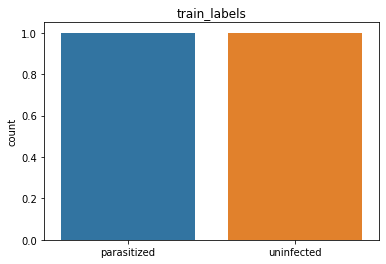

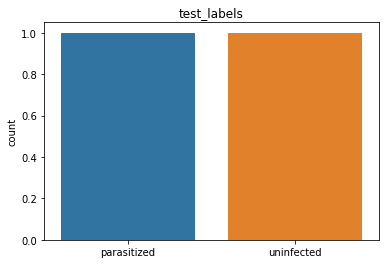

In [29]:
#plotting the labels of train and test data and checking if they are balanced

data_train_labels = pd.DataFrame({'parasitized':[12582],
                     'uninfected':[12376]})
data_test_labels = pd.DataFrame({'parasitized':[1300],
                     'uninfected':[1300]})

sns.countplot(data=data_train_labels)
plt.title('train_labels')
plt.show()
sns.countplot(data=data_test_labels)
plt.title('test_labels')
plt.show()

**Observations and insights:**
From the above count plot, we notice that in both train and test labels, the data are evenly splited between parasitized and uninfected image classes.

### <b>Data Exploration</b>
Let's visualize the images from the train data

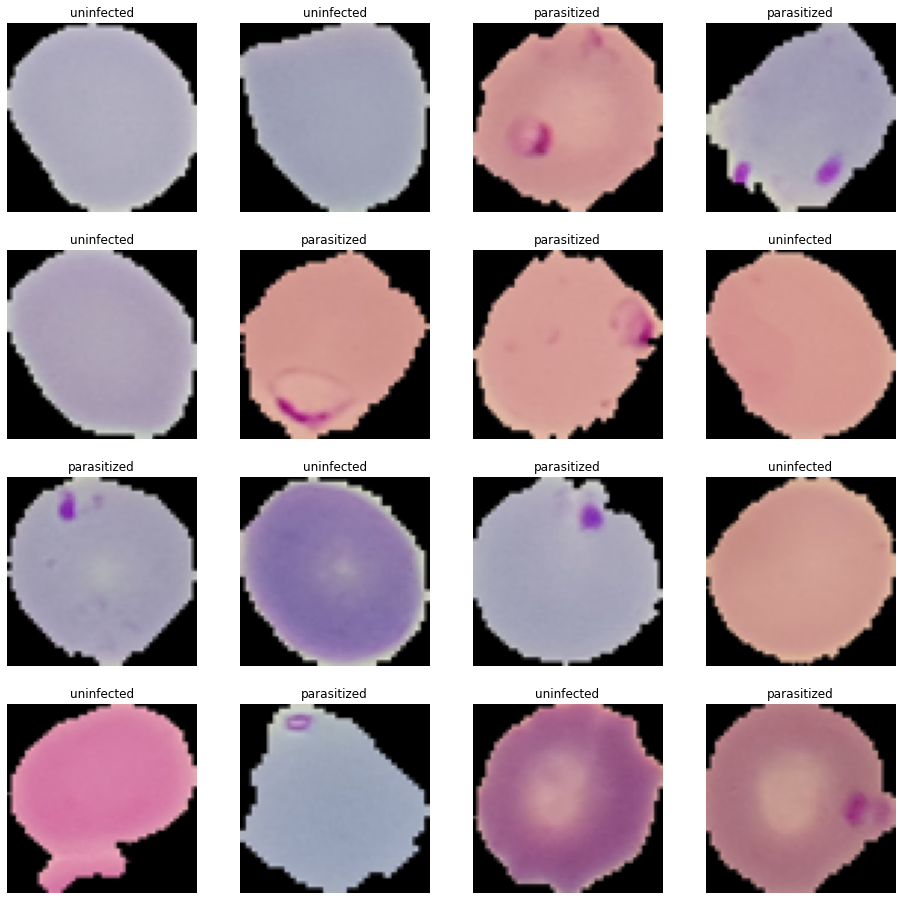

In [30]:
# visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

**Observations and insights:**

After visualizing both the parasitized and infected images, we notice that parasitized images are quite different as they have a distinct pink mark on them compare to uninfected images.

<B>One Hot Encoding on the train and test labels

In [31]:
# Encoding Train Labels
train_labels = tf.keras.utils.to_categorical(train_labels, 2)

# encoding test labels
test_labels = tf.keras.utils.to_categorical(test_labels, 2)

### **Base Model**


<b> Importing the required libraries for building and training our Model

In [32]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

<b> Building the model

In [33]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b> Compiling the model

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [13]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

Simply put, **callbacks** are the special utilities or functions that are executed during training at given stages of the training procedure. Callbacks can help to prevent overfitting, visualize training progress, debug your code, save checkpoints, generate logs, create a TensorBoard, etc.

<b> Fit and train the Base Model

In [14]:
# Fittting the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 107s 170ms/step - loss: 0.4240 - accuracy: 0.7947 - val_loss: 0.2410 - val_accuracy: 0.9189
Epoch 2/20
624/624 [==============================] - 99s 159ms/step - loss: 0.1276 - accuracy: 0.9539 - val_loss: 0.1026 - val_accuracy: 0.9868
Epoch 3/20
624/624 [==============================] - 101s 162ms/step - loss: 0.0953 - accuracy: 0.9688 - val_loss: 0.1445 - val_accuracy: 0.9822
Epoch 4/20
624/624 [==============================] - 99s 159ms/step - loss: 0.0799 - accuracy: 0.9731 - val_loss: 0.0666 - val_accuracy: 0.9880
Epoch 5/20
624/624 [==============================] - 101s 163ms/step - loss: 0.0727 - accuracy: 0.9742 - val_loss: 0.0912 - val_accuracy: 0.9810
Epoch 6/20
624/624 [==============================] - 101s 162ms/step - loss: 0.0706 - accuracy: 0.9765 - val_loss: 0.0835 - val_accuracy: 0.9814


<b> Evaluating the model on test data

In [15]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 4s 41ms/step - loss: 0.0924 - accuracy: 0.9708

 Test_Accuracy:- 0.9707692265510559


<b> Plotting the confusion matrix

82/82 [==============================] - 4s 46ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1300
           1       0.98      0.96      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



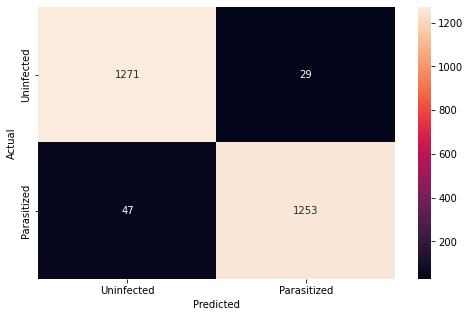

In [16]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [17]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

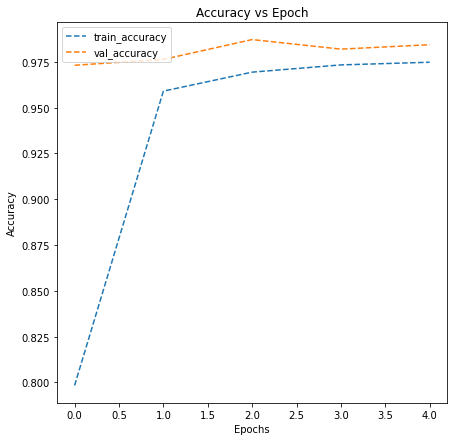

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing with epochs
* And we can also notice that validation accuracy is higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

### <b> Model 1: <b> Trying to improve the performance of the base model by adding new layers


In [18]:
backend.clear_session() # Clearing the backend for new model

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

<b> Building the Model

In [19]:
# Creating sequential model
model1 = Sequential()

# Build the model here and add new layers

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b> Compiling the model

In [20]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [21]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fitting and Trainning the model

In [22]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 102s 163ms/step - loss: 0.3464 - accuracy: 0.8279 - val_loss: 0.1158 - val_accuracy: 0.9820
Epoch 2/20
624/624 [==============================] - 101s 161ms/step - loss: 0.0989 - accuracy: 0.9670 - val_loss: 0.0617 - val_accuracy: 0.9896
Epoch 3/20
624/624 [==============================] - 98s 158ms/step - loss: 0.0827 - accuracy: 0.9735 - val_loss: 0.0683 - val_accuracy: 0.9862
Epoch 4/20
624/624 [==============================] - 101s 161ms/step - loss: 0.0731 - accuracy: 0.9753 - val_loss: 0.0492 - val_accuracy: 0.9876
Epoch 5/20
624/624 [==============================] - 99s 159ms/step - loss: 0.0701 - accuracy: 0.9755 - val_loss: 0.0762 - val_accuracy: 0.9796
Epoch 6/20
624/624 [==============================] - 101s 162ms/step - loss: 0.0709 - accuracy: 0.9773 - val_loss: 0.0809 - val_accuracy: 0.9752


<b> Evaluating the model

In [23]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 4s 41ms/step - loss: 0.0607 - accuracy: 0.9819

 Test_Accuracy:- 0.9819231033325195


<b> Plotting the confusion matrix

82/82 [==============================] - 3s 42ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



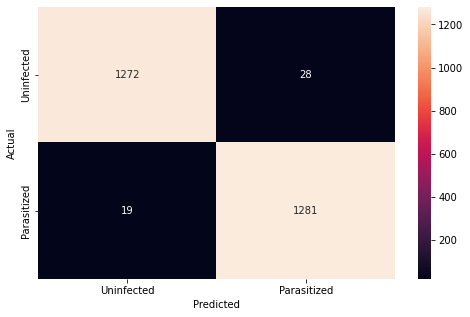

In [25]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

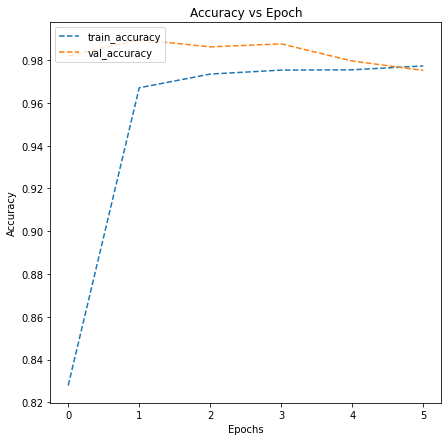

In [26]:
def plot_accuracy(history1):

    N = len(history1.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history1.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history1.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

plot_accuracy(history1)

<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

### <b> Model 2: with Batch Normalization

In [34]:
backend.clear_session() # Clearing the backend for new model

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

<b> Building the Model

In [28]:
#Importing BatchNormalization libraries

from tensorflow.keras.layers import BatchNormalization, LeakyReLU

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 3, padding = "same"))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 3, padding = "same"))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 32, kernel_size = 3, padding = "same"))

model2.add(LeakyReLU(0.1))

model2.add(MaxPooling2D(pool_size = 2))

model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(512))

model2.add(LeakyReLU(0.1))

model2.add(BatchNormalization())

model2.add(Dropout(0.4))

model2.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

adam = optimizers.Adam(learning_rate = 0.001)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                        

<b>Compiling the model

In [29]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [30]:
'''
callbacks will help in saving checkpoints and stopping at an accuracy where the model doesnot seem to improve
'''
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [31]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 157s 249ms/step - loss: 0.2639 - accuracy: 0.8815 - val_loss: 0.0767 - val_accuracy: 0.9866
Epoch 2/20
624/624 [==============================] - 153s 245ms/step - loss: 0.1057 - accuracy: 0.9654 - val_loss: 0.0391 - val_accuracy: 0.9884
Epoch 3/20
624/624 [==============================] - 155s 249ms/step - loss: 0.0961 - accuracy: 0.9707 - val_loss: 0.0387 - val_accuracy: 0.9876
Epoch 4/20
624/624 [==============================] - 155s 249ms/step - loss: 0.0888 - accuracy: 0.9725 - val_loss: 0.0554 - val_accuracy: 0.9822
Epoch 5/20
624/624 [==============================] - 157s 251ms/step - loss: 0.0821 - accuracy: 0.9734 - val_loss: 0.0565 - val_accuracy: 0.9810


<b>Plotting the train and validation accuracy

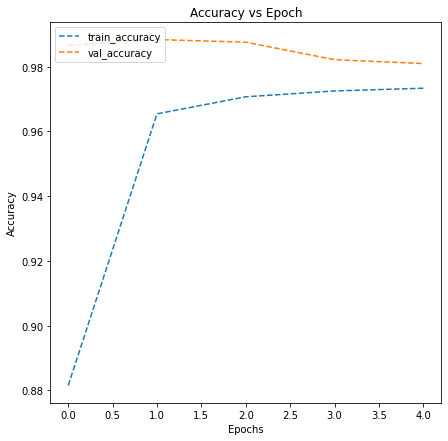

In [32]:
# Plotting the accuracies
def plot_accuracy(history2):

    N = len(history2.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history2.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history2.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

plot_accuracy(history2)

<b>Evaluating the model

In [33]:
#Model evaluation to calculate the accuracy

accuracy = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 6s 69ms/step - loss: 0.0563 - accuracy: 0.9800

 Test_Accuracy:- 0.9800000190734863


**Observations and insights:**

In the above plot, we can see that the validation accuracy is almost same as test accuracy, which means our perform just good. However, we still have chances to improve the performance by applying other techniques.

<b> Generating the classification report and confusion matrix 

82/82 [==============================] - 6s 66ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



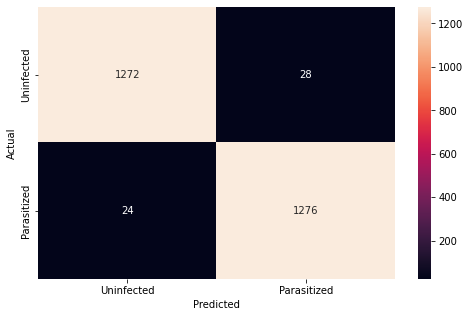

In [34]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





### <b>Model 3: with Data Augmentation

In [38]:
backend.clear_session() # Clearing backend for new model
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

<b> Using image data generator

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

**Now lets Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.**



<B>Visualizing Augmented images

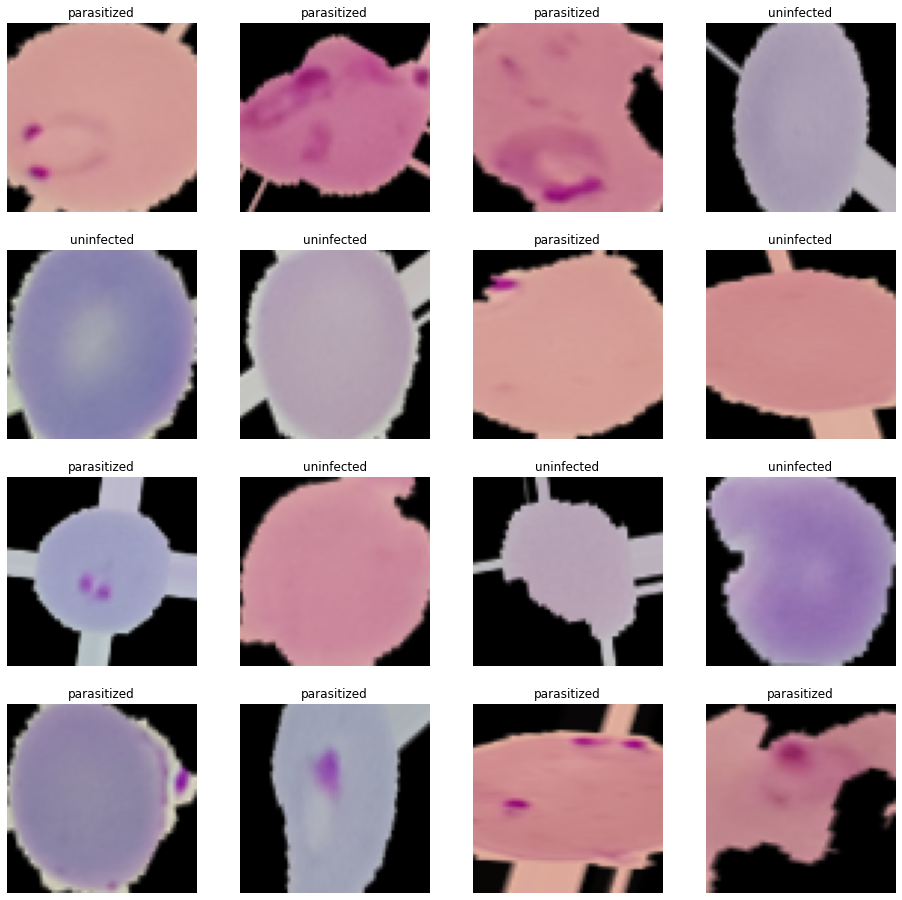

In [40]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

**Observations and insights:**
In data analysis, procedures known as "data augmentation" is used to expand the amount of data by adding copies of current data that have been significantly modified or by generating new synthetic data out of existing data. In this case, I have to check the model peformance after agmentation.

<b>Model 3: Building the Model

In [41]:
# Build the model here

model3 = Sequential()

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model3.add(MaxPooling2D(pool_size = 2))

model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512, activation = "relu"))

model3.add(Dropout(0.4))

model3.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model3.summary()

# Use this as the optimizer
adam = optimizers.Adam(learning_rate = 0.001)

model3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b>Using Callbacks

In [42]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [43]:
history3 = model3.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 124s 389ms/step - loss: 0.5737 - accuracy: 0.6842 - val_loss: 0.1464 - val_accuracy: 0.9573
Epoch 2/20
312/312 [==============================] - 116s 372ms/step - loss: 0.2089 - accuracy: 0.9220 - val_loss: 0.1003 - val_accuracy: 0.9740
Epoch 3/20
312/312 [==============================] - 114s 364ms/step - loss: 0.1858 - accuracy: 0.9367 - val_loss: 0.0871 - val_accuracy: 0.9764
Epoch 4/20
312/312 [==============================] - 115s 368ms/step - loss: 0.1702 - accuracy: 0.9417 - val_loss: 0.0718 - val_accuracy: 0.9802
Epoch 5/20
312/312 [==============================] - 112s 359ms/step - loss: 0.1623 - accuracy: 0.9435 - val_loss: 0.0700 - val_accuracy: 0.9804
Epoch 6/20
312/312 [==============================] - 112s 359ms/step - loss: 0.1573 - accuracy: 0.9471 - val_loss: 0.0705 - val_accuracy: 0.9790
Epoch 7/20
312/312 [==============================] - 118s 377ms/step - loss: 0.1533 - accuracy: 0.9479 - val_loss: 0.0654 -

<B>Evaluating the model

<b>Ploting the train and validation accuracy

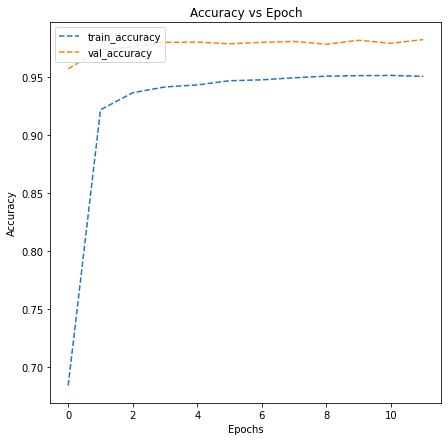

In [44]:
# Potting the accuracies
def plot_accuracy(history3):

    N = len(history3.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history3.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history3.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

plot_accuracy(history3)

<b>Plotting the train and validation loss

In [45]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 4s 46ms/step - loss: 0.0770 - accuracy: 0.9788

 Test_Accuracy:- 0.9788461327552795


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 3s 41ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



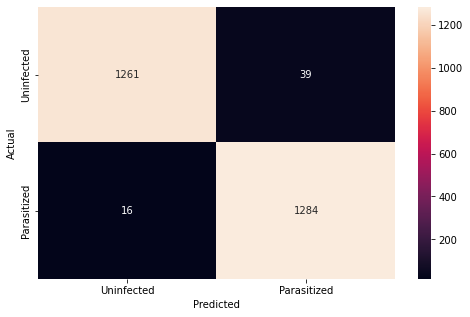

In [46]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

The model does very well, reduced the false negatives significantly to 16 cases.

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Model:4 Pre-trained model (VGG16)**

In [35]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [36]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [38]:
from tensorflow.keras.layers import BatchNormalization

transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Adding classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly adding a dense layer with 128 neurons

x = Dense(128, activation = 'relu')(x)

x = Dropout(0.3)(x)

# Adding a dense layer with 64 neurons
x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

<b>Compiling the model

In [39]:
# Compiling the model
adam = optimizers.Adam(learning_rate = 0.001)

model4.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

<b> using callbacks

In [40]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [41]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            train_images, train_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 240,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
84/84 [==============================] - 1070s 13s/step - loss: 0.2754 - accuracy: 0.8912 - val_loss: 0.3173 - val_accuracy: 0.8500
Epoch 2/10
84/84 [==============================] - 1072s 13s/step - loss: 0.1728 - accuracy: 0.9350 - val_loss: 0.3434 - val_accuracy: 0.8462
Epoch 3/10
84/84 [==============================] - 1083s 13s/step - loss: 0.1529 - accuracy: 0.9447 - val_loss: 0.3302 - val_accuracy: 0.8359


<b>Plotting the train and validation accuracy

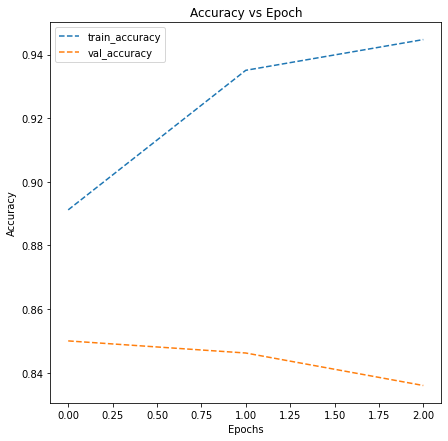

In [42]:
# plotting the accuracies
def plot_accuracy(history4):

    N = len(history4.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history4.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history4.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

plot_accuracy(history4)

**Observations and insights:**

1. From the above plot, we see that here is a much difference between traning and validation accuaracy. The model is overfitting the training data.


<b> Evaluating the model

In [43]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 117s 1s/step - loss: 0.2614 - accuracy: 0.8708

 Test_Accuracy:- 0.870769202709198


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 115s 1s/step
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1300
           1       0.80      0.99      0.88      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



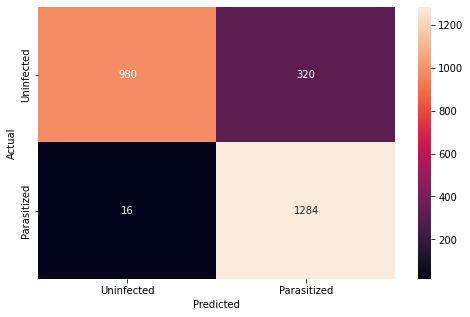

In [44]:
# Plotting the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Think about it:**
What observations and insights can be drawn from the confusion matrix and classification report?

The confusion matrix provide us the overall performance of the model, how accurate the model performs. The accuracy, precision, and recall which presents the comparison of the prediction with actual data. The more accurate our prediction, the more strong our model. But decesion sometimes vary based on the particular scenario, for instance, in our case, we have data related to medical industry, so we will prefer recall as if we classify one infected case as uninfected it is more dangerous.

Comparing all the models (we have five total models), I choose model 3 as the final model. For model 3, the test accuracy and validation accuracy almost similar and does not overfit the training data and has lowest false positive instances. So, the final model in this scenario is model 3.


**Observations and Conclusions drawn from the final model:**

**Observations:**
1. The final model is giving about 98% accuracy on the test data which is comparable to the accuracy of the validation data. This implies that the model is giving a very good performance.
2. The recall for both the classes is high but slightly better at indentifying parasitized celss, whcih we emphasize in this particular case.
3. In contrast, the precision is slightly better to identify uninfected cells.
4. There are some data points that model 3 incorrectly categorised.
39 uninfected instances are projected to be parasitized, compared to 16 parasitized cases that are predicted to be uninfected.

**Conclusions:**
1. Comparing to other 4 models, model 3 preform well on both the validation and testing sets.
2. Model 3 has parametrers around 276,000 which is among the lowest within all the models and it performs very well.

There is still scope for improvement and we can try out tuning different hyperparameters to improve the model performance.



